# Восстановление золота из руды

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

При выполнении проекта будем обращаться к  библиотекам *pandas*, *matplotlib* и *sklearn.* 

***Описание целей и задач проекта:***

Подготовить прототип модели машинного обучения для компании «Цифры», которая разрабатывает решения для эффективной работы промышленных предприятий. 
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.
В вашем распоряжении данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками

***Описание данных:***

Данные находятся в трёх файлах:
- gold_recovery_train_new.csv — обучающая выборка;
- gold_recovery_test_new.csv — тестовая выборка;
- gold_recovery_full_new.csv — исходные данные.

Технологический процесс
Rougher feed — исходное сырье
Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
Xanthate **— ксантогенат (промотер, или активатор флотации);
Sulphate — сульфат (на данном производстве сульфид натрия);
Depressant — депрессант (силикат натрия).
Rougher process (англ. «грубый процесс») — флотация
Rougher tails — отвальные хвосты
Float banks — флотационная установка
Cleaner process — очистка
Rougher Au — черновой концентрат золота
Final Au — финальный концентрат золота
Параметры этапов
air amount — объём воздуха
fluid levels — уровень жидкости
feed size — размер гранул сырья
feed rate — скорость подачи
Наименование признаков

Наименование признаков должно быть такое:
[этап].[тип_параметра].[название_параметра]
Пример: rougher.input.feed_ag
Возможные значения для блока [этап]:
rougher — флотация
primary_cleaner — первичная очистка
secondary_cleaner — вторичная очистка
final — финальные характеристики
Возможные значения для блока [тип_параметра]:
input — параметры сырья
output — параметры продукта
state — параметры, характеризующие текущее состояние этапа
calculation — расчётные характеристики

***План работы:***

1) ***Подготовить данные:***
 - открыть и изучть файлы
 - проверьте, что эффективность обогащения рассчитана правильно. Вычислить её на обучающей выборке для признака rougher.output.recovery. Найти MAE между вашими расчётами и значением признака. Описать выводы.
 - проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
 - проведите предобработку данных.
 
2) ***Анализ данных:***
 - посмотрить, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 
 - сравнить распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
 - исследовать суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентрата

3) ***Построитеь модель***
 - подобрать и обучить модель 
 - написать функцию для вычисления требуемой итоговой метрики  sMAPE.
 - обучить разные модели и оцените их качество кросс-валидацией. Выбрать лучшую модель и проверитьеё на тестовой выборке. Описать выводы.
 
Нужно спрогнозировать сразу две величины:

эффективность обогащения чернового концентрата rougher.output.recovery;

эффективность обогащения финального концентрата final.output.recovery.

## Подготовка данных

Соберем ниже все import проекта 

In [1]:
#все импорты библиотек для текущего проекта
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats as st
from sklearn.metrics import make_scorer, mean_absolute_error
from numpy.random import RandomState
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

## Анализ данных

Загрузим данные и проведем их анализ.

In [2]:
#обучающая выборка
data_train= pd.read_csv('/datasets/gold_recovery_train_new.csv')
#тренировочная выборка 
data_test= pd.read_csv('/datasets/gold_recovery_test_new.csv')
#исходный датасет
data_full= pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
display(data_train.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [6]:
display(data_test.head())

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [8]:
display(data_full.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


***Выводы по предварительному анализу данных***

1. В датафреймах есть пропуски, надо будет их заполнить с учетом условия в задаче, что данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.

2. Также  изменим формат ячейки date на datatime.

3. Проверим информацию в таблицах на наличие дубликатов.

4. Количество столбцов в датафреме test (53) отличается от train и full (где пл 87). Надо проанализировать отличия. Возможно из train придется удалить часть столбцов, отсутсвующих в test, чтобы при обучении моделй не было утечки целевого признака.

Рассчитаем показатель эффективность обогащения и найдем MAE между вашими расчётами и значением признака

In [9]:
C = data_train['rougher.output.concentrate_au'] #доля золота в сырье после очистки
F = data_train['rougher.input.feed_au'] # доля золота в сырье до очистки
T = data_train['rougher.output.tail_au'] #доля золота в отвальных хвостах
recovery_check = (C*(F-T))/(F*(C-T))*100

print('Среднее знечение  recovery, расчетное:', recovery_check.mean()) 
print('Среднее знечение  rougher.output.recovery:', data_train['rougher.output.recovery'].mean())
#посчитаем MAE
print('MAE:', mean_absolute_error(data_train['rougher.output.recovery'], recovery_check))

Среднее знечение  recovery, расчетное: 82.70450164550293
Среднее знечение  rougher.output.recovery: 82.70450164550293
MAE: 9.73512347450521e-15


***Вывод:***
MAE - показывает как различается показатель обогащенния, указанный в датафрейме (колонка "rougher.output.recovery") от рассчитанного (recovery_check).

В данном случае различия составлет ~9.735, значение небольшое.
Продолжим анализ данных.

***Признаки, недоступные в тестовой выборке***

Проанализируйте признаки, недоступные в тестовой выборке. 
- посмотрим, что это за параметры 
-  какотму типу они относятся

In [10]:
#выведем колонки, которые отсутствуют в тестовой выборке по сравнению с обучающей
missed_columns = set(data_train.columns) - set(data_test.columns)
print(missed_columns)
print("")
print('\nКоличество отсутствующих признаков -', len(missed_columns))

{'primary_cleaner.output.tail_au', 'rougher.calculation.au_pb_ratio', 'primary_cleaner.output.tail_ag', 'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_sol', 'rougher.calculation.sulfate_to_au_concentrate', 'final.output.tail_au', 'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'rougher.output.tail_sol', 'rougher.output.concentrate_pb', 'rougher.output.tail_pb', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_sol', 'final.output.tail_ag', 'rougher.output.concentrate_ag', 'rougher.output.tail_ag', 'secondary_cleaner.output.tail_sol', 'rougher.output.tail_au', 'final.output.concentrate_au', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'secondary_cleaner.output.tail_pb', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'final.output.concentrate_pb', 'final.output.concentrate_ag', 'rougher.output.recovery', 'final.output.recovery', 'primary_cleaner.output.tail_pb', 'secondary_cleaner.o

***Вывод по колонкам, отсутствующим в тестовой выборке:***

В данным по тестовой выборке отсутсвтуют колонки с признаками для флотации, первичной,вторичной очистке и финальные характеристики. Причина их отсутствия скорее всого в том,что они замеряются значительно позже, как это укащано в описании к задаче.
Отсутствие этих признаком для нас неважно, так как их мы бы все равно удаляли. Ведь их наличие приведет к утечке целевого признака. 

В тестовой выборки также отсутствуют целевые признаки rougher.output.recovery и final.output.recovery, которые будут нужны для расчета метрики качества. Добавим их в тестовую выборку, используя метод merge, в качестве индексов используем колонку date (данные индексируются датой и временем получения информации).

***ПРЕДОБРАБОТКА ДАННЫХ***

В предобработке данных сделаем следующее:

1) переведем данные в колоке data  в формат datatime

2) удалим при наличии явные дубликаты

3) посмотрим насколько критичны пропуски, заполним пропушенные данные согласно условиям задачи

4) добавим в тестовую выборку признаки rougher.output.recovery и final.output.recovery, которые будут нужны для расчета метрик качества 

5) удалим лишние и приводящие к утечке целевого признака данные

***1) Переведем данные в колоке data  в формат datatime в датафреймах  data_train, data_test и data_full***

In [11]:
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')
data_train.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

In [12]:
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')
data_train.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

In [13]:
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')
data_train.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

***2) Посчитаме и удалим явные дубликаты в данных в их наличии***

In [14]:
#print (data_train['data'].duplicated.sum())

print('Дубликаты в данных по датафреймам:')
print('обучающая', data_train['date'].duplicated().sum())
print('тестовая', data_test['date'].duplicated().sum())
print('полная', data_full['date'].duplicated().sum())

Дубликаты в данных по датафреймам:
обучающая 0
тестовая 0
полная 0


Вывод: явных дубликатов нет. 

***3) Посмотрим насколько критичны пропуски***

Известно, что данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи. Данные в таблице расположены в хронологичесокм порядке (это видно из таблиц).


Исходя из этого заполним пропущенные данные значениями из предудущей строки с помощию функции ffill() и переименуем датафреймы


In [15]:
df_train = data_train.ffill(axis=0)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14149 non-null  float64       
 2   final.output.concentrate_pb                         14149 non-null  float64       
 3   final.output.concentrate_sol                        14149 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14149 non-null  float64       
 8   final.

In [16]:
df_test = data_test.ffill(axis=0)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5290 non-null   float64       
 2   primary_cleaner.input.depressant            5290 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5290 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

In [17]:
df_full = data_full.ffill(axis=0)
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19439 non-null  float64       
 2   final.output.concentrate_pb                         19439 non-null  float64       
 3   final.output.concentrate_sol                        19439 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19439 non-null  float64       
 7   final.output.tail_pb                                19439 non-null  float64       
 8   final.

Таким образом исчезли все пропуски в данных.

***4) Добавим в тестовую выборку признаки rougher.output.recovery и final.output.recovery, которые будут нужны для расчета метрик качества***

Так как известно, что данные индексируются датой и временем получения информации (признак date), добавим недостаюшие признаки из выборки df_full c помощью функции метода merge

In [18]:
df_test = df_test.merge(df_full.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')
display(df_test.head())

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


In [19]:
#удалим лишний признак -  date
df_train = df_train.drop(columns=['date'], axis=1) 
df_test = df_test.drop(columns=['date'], axis=1) 

***АНАЛИЗ ДАННЫХ***

- посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 
- сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
- исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентрата

1) Посмотрим как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

Text(0.5, 1.0, 'Концентрация металла Au на разных этапах очистки')

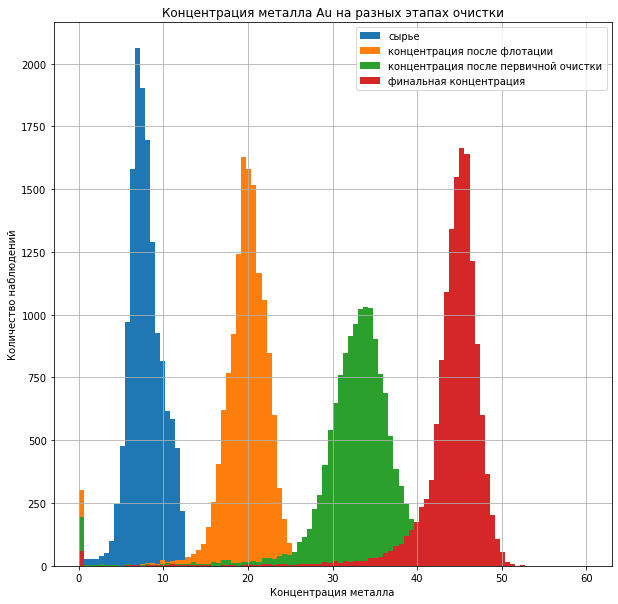

In [20]:
#концентрация металла Au на разных этапах очистки
plt.figure(figsize=[10, 10])
df_train['rougher.input.feed_au'].hist(bins=100, label = 'сырье', range = (0,60))
df_train['rougher.output.concentrate_au'].hist(bins=100,label = 'концентрация после флотации', range = (0,60))
df_train['primary_cleaner.output.concentrate_au'].hist(bins=100, label = 'концентрация после первичной очистки', range = (0,60))
df_train['final.output.concentrate_au'].hist(bins=100, label = 'финальная концентрация', range = (0,60))
plt.xlabel('Концентрация металла')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.title('Концентрация металла Au на разных этапах очистки')

Text(0.5, 1.0, 'Концентрация металла Ag на разных этапах очистки')

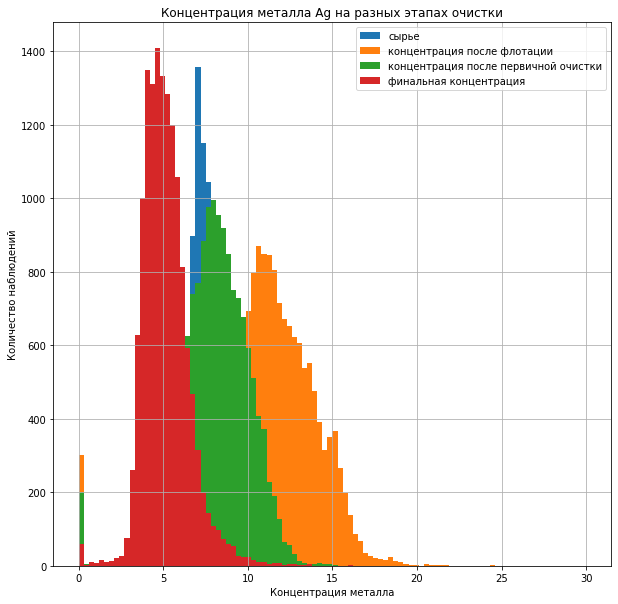

In [21]:
#концентрация металла Ag на разных этапах очистки
plt.figure(figsize=[10, 10])
df_train['rougher.input.feed_ag'].hist(bins=100, label = 'сырье', range = (0,30))
df_train['rougher.output.concentrate_ag'].hist(bins=100,label = 'концентрация после флотации', range = (0,30))
df_train['primary_cleaner.output.concentrate_ag'].hist(bins=100, label = 'концентрация после первичной очистки', range = (0,30))
df_train['final.output.concentrate_ag'].hist(bins=100, label = 'финальная концентрация', range = (0,30))
plt.xlabel('Концентрация металла')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.title('Концентрация металла Ag на разных этапах очистки')

Text(0.5, 1.0, 'Концентрация металла Pb на разных этапах очистки')

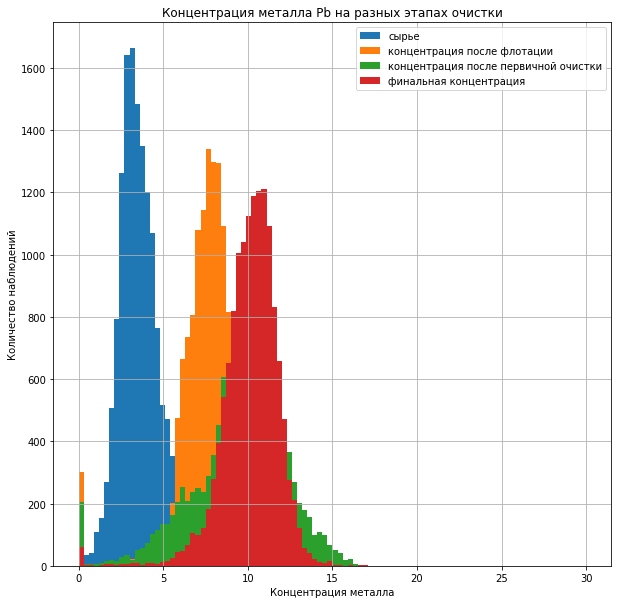

In [22]:
#концентрация металла Pb на разных этапах очистки
plt.figure(figsize=[10, 10])
df_train['rougher.input.feed_pb'].hist(bins=100, label = 'сырье', range = (0,30))
df_train['rougher.output.concentrate_pb'].hist(bins=100,label = 'концентрация после флотации', range = (0,30))
df_train['primary_cleaner.output.concentrate_pb'].hist(bins=100, label = 'концентрация после первичной очистки', range = (0,30))
df_train['final.output.concentrate_pb'].hist(bins=100, label = 'финальная концентрация', range = (0,30))
plt.xlabel('Концентрация металла')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.title('Концентрация металла Pb на разных этапах очистки')

***Выводы по гистограммам:***

1) Доля золота (Au) на после каждого этапа очисnки постепенно увеличивается.
Для серебра(AG):

2) Доля серебра (Ag)увеличивается на этапе флотации, а затем постепенно уменьшается.

3) Доля свинца (Pb) сначала увеличивается на этапе флотации и после первичной очитски, затем остатется примерно на одном уровне.


В данных для каждого металла присутствуют аномалии.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

2) Cравним распределения размеров гранул сырья на обучающей и тестовой выборках. 
Если распределения сильно отличаются друг от друга, оценка модели будет неправильной. Для визуализации распределения построим  график KDE и оценим распределение значений функцией describe.

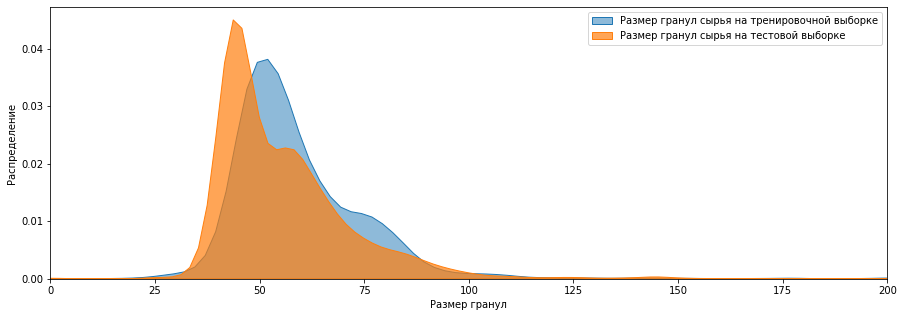

count    14005.000000
mean        60.110518
std         22.418485
min          9.659576
25%         48.973027
50%         55.373885
75%         66.080172
max        484.967466
Name: rougher.input.feed_size, dtype: float64
count    5289.000000
mean       55.951097
std        19.081758
min         0.046369
25%        43.906347
50%        50.841029
75%        62.431047
max       392.494040
Name: rougher.input.feed_size, dtype: float64


In [23]:
# Распределение гранул сырья на выборках входе train и test
plt.figure(figsize=(15, 5))
sns.kdeplot(data_train['rougher.input.feed_size'], label='Размер гранул сырья на тренировочной выборке', alpha=0.5, shade=True)
sns.kdeplot(data_test['rougher.input.feed_size'], label='Размер гранул сырья на тестовой выборке', alpha=0.7, shade=True)
plt.xlim([0, 200])
plt.xlabel('Размер гранул')
plt.ylabel('Распределение')
plt.legend(loc='upper right')
plt.show()
print(data_train['rougher.input.feed_size'].describe())
print(data_test['rougher.input.feed_size'].describe())

Распределение гранул сырья  на обучающей и тетсовой выборке находится примерно в одинаковом диапазоне. Значимых различий между распределениями в выборках нет.

3) Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [24]:
#суммарная концентрация всех веществ на разных стадиях  в обучающей выборке
sum_of_rougher_input_feed = 0
sum_of_rougher_output_concentrate = 0
sum_concentrate_of_primary_cleaner_output = 0
sum_final_output_concentrate = 0
for metal in ['au', 'ag', 'pb', 'sol']:
    sum_of_rougher_input_feed += df_train[f'rougher.input.feed_{metal}']
    sum_of_rougher_output_concentrate += df_train[f'rougher.output.concentrate_{metal}']
    sum_concentrate_of_primary_cleaner_output += df_train[f'primary_cleaner.output.concentrate_{metal}']
    sum_final_output_concentrate += df_train[f'final.output.concentrate_{metal}']
    


Text(0.5, 1.0, 'Суммарная концентрация веществ на разных стадиях')

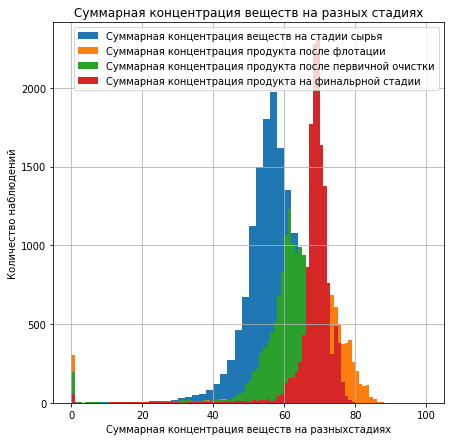

In [25]:
plt.figure(figsize=[7, 7])

sum_of_rougher_input_feed.hist(bins=50, label = 'Cуммарная концентрация веществ на стадии сырья', range = (0,100))
sum_of_rougher_output_concentrate.hist(bins=100, label = 'Cуммарная концентрация продукта после флотации', range = (0,100))
sum_concentrate_of_primary_cleaner_output.hist(bins=100, label = 'Cуммарная концентрация продукта после первичной очистки', range = (0,100))
sum_final_output_concentrate.hist(bins=100, label = 'Cуммарная концентрация продукта на финальрной стадии', range = (0,100))
plt.xlabel('Суммарная концентрация веществ на разныхстадиях')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.title('Суммарная концентрация веществ на разных стадиях')

Суммарная концентрация веществ увеличивается к финальному этапу,  при этом  диапазон распределения суммарной концентрации веществ уменьшается.

Для суммарной концентрация веществ на этапах флотации, первичной очистки и финального присутствуют аномалии ( значения в районе 0). Их необходимо будет удалить, чтобы аномалии не повлияли отрицательно на качество обчения модели. 

In [26]:
#удалим нулевые значения для металлов в обучающей и тестовой выборке
df_train= df_train[(df_train['rougher.output.concentrate_au'] != 0) & (df_train['rougher.output.concentrate_ag'] != 0) & (df_train['rougher.output.concentrate_pb'] != 0) & (df_train['rougher.output.concentrate_sol'] != 0)]
df_train = df_train[(df_train['primary_cleaner.output.concentrate_au'] != 0) & (df_train['primary_cleaner.output.concentrate_ag'] != 0) & (df_train['primary_cleaner.output.concentrate_pb'] != 0) & (df_train['primary_cleaner.output.concentrate_sol'] != 0)]
df_train = df_train[(df_train['final.output.concentrate_au'] != 0) & (df_train['final.output.concentrate_ag'] != 0) & (df_train['final.output.concentrate_pb'] != 0) & (df_train['final.output.concentrate_sol'] != 0)]




***ВЫВОД:***

1) Распределения гранул сырья на обучающей и тестовой выборках значительных различий не имеют

2) Доля золота увеличивается по мере прохождения этапов очистки

3) В анализа суммарной концентрации веществ на разных стадиях были выявлены аномалии (нулевые значения), которые были удалены для улучшения качества будущих моделей прогнозирования.

## Модель

***Построим модель***
 - напишем  функцию для вычисления требуемой итоговой метрики  sMAPE
 - подберем и обучим модель 
 - обучим  разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке. Сделаем выводы.

Удалим из обучающей выборки признаки, которые отсутствуби в тестовой, чтобы не было утеи целевого признака

In [27]:
#удалим из обучающей выборки прищнаки, приводящие к утечке целевого признака
df_train = df_train.drop(columns = ['secondary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 
                                      'rougher.output.tail_sol', 'final.output.concentrate_sol', 'rougher.calculation.floatbank10_sulfate_to_au_feed',
                                      'primary_cleaner.output.concentrate_sol', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 
                                      'final.output.tail_sol', 'final.output.concentrate_pb', 'rougher.output.concentrate_au', 
                                      'final.output.tail_ag', 'rougher.output.concentrate_sol', 'secondary_cleaner.output.tail_au', 
                                      'final.output.tail_pb', 'primary_cleaner.output.tail_au', 'rougher.output.tail_pb', 
                                      'primary_cleaner.output.concentrate_pb', 'rougher.calculation.sulfate_to_au_concentrate', 
                                      'secondary_cleaner.output.tail_pb', 'rougher.output.concentrate_ag', 'final.output.concentrate_ag', 
                                      'rougher.output.tail_ag', 'secondary_cleaner.output.tail_ag', 'primary_cleaner.output.concentrate_au', 
                                      'rougher.output.concentrate_pb', 'rougher.output.tail_au', 
                                      'primary_cleaner.output.tail_sol', 'rougher.calculation.au_pb_ratio', 'final.output.tail_au', 
                                      'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_ag', 
                                      'final.output.concentrate_au'], axis =1)

In [28]:
#проверим, что колонки в обучающей и тетсовой выборке, которые будем использовать для машинного обучения совпадают

chekc_columns = set(df_train.columns) - set(df_test.columns)
print(chekc_columns)
print("")
print('Разница в столбцах:', len(chekc_columns))

set()

Разница в столбцах: 0


***Подготовим данные для обучения***

In [29]:
#извлекаем  признаки и удалим целевые признаки product и лишний id
features_train = df_train.drop(columns=['rougher.output.recovery', 'final.output.recovery'], axis=1)  
features_test = df_test.drop(columns=['rougher.output.recovery', 'final.output.recovery'], axis=1)  

# извлекаем целевой признак
target_train_rougher = df_train['rougher.output.recovery'] 
target_train_final_rec = df_train['final.output.recovery'] 
target_test_rougher = df_test['rougher.output.recovery'] 
target_test_final_rec = df_test['final.output.recovery'] 

print('Проверка')
print('Обучающая:', features_train.shape)
print('Тестовая:', features_test.shape)

Проверка
Обучающая: (13716, 52)
Тестовая: (5290, 52)


***Функция для вычисления sMAPE***

In [30]:
#вычислеие SMape
# Метод получения sMape для одного этапа
def smape_func(target, pred):

    
    smape = abs(target-pred)/((abs(target)+abs(pred))/2)*100
    smape = smape.fillna(value=0)

    smape = np.mean(smape)
    return smape

In [31]:
#вычисление SMape,target_rouger, pred_rougher, target_final, pred_final
def summary_smape_func(target_rouger, pred_rougher, target_final, pred_final):
    
    # вычислим smape для rouger
    smape_rouger = smape_func(target_rouger, pred_rougher)
    # вычислим smape для final
    smape_final = smape_func(target_final, pred_final)
    
    #  вычислим итоговый smape
    summary_smape = 0.25 * smape_rouger + 0.75 * smape_final
    
    return summary_smape

In [32]:
#Метод для вычисления итоговой sMAPE, когда на входе smape_rouger и smape_final
def summary_smape(smape_rouger, smape_final):
    
    #  вычислим итоговый smape
    summary_smape = 0.25 * smape_rouger + 0.75 * smape_final
    
    return summary_smape

***Функция для вычисления итоговой sMAPE***

In [33]:
smape_scorer = make_scorer(smape_func, greater_is_better=False)

***Обучим 3 разные модели и оценим их качество кросс-валидацией***

***Модель линейной регресии*** 

In [34]:
# инициируем модель линейной регрессии
model_line_reg_rougher = LinearRegression()

In [35]:
# оценим модель с помощью кроссвалидации features_train, target_train. Вычислим sMape_rougher
scores_line_reg_rougher = cross_val_score(model_line_reg_rougher,  
                                          features_train, 
                                          target_train_rougher, 
                                          scoring = smape_scorer,
                                          cv = 5)
smape_rougher = sum(scores_line_reg_rougher )/ len(scores_line_reg_rougher )

print('Средняя оценка качества sMape_rougher', abs(round(smape_rougher, 4)))

Средняя оценка качества sMape_rougher 7.27


In [36]:
# оценим модель с помощью кроссвалидации features_train, target_train. Вычислим score_final
scores_line_reg_final = cross_val_score(model_line_reg_rougher,  
                                          features_train, 
                                          target_train_final_rec, 
                                          scoring = smape_scorer,
                                          cv = 5)

smape_final = sum(scores_line_reg_final)/ len(scores_line_reg_final)

print('Средняя оценка качества sMape_final', abs(round(smape_final, 4)))

Средняя оценка качества sMape_final 10.9408


In [37]:
# вычислим итоговую оценку sMape
smape_total = summary_smape(smape_rougher, smape_final)
print('Средняя итоговая оценка качества модели линейной регрессии sMape ', abs(round(smape_total, 4)))

Средняя итоговая оценка качества модели линейной регрессии sMape  10.0231


***Модель дерева решений***

In [38]:
%%time
# Проведем оценку для этапа rougher

# Инициируем модель дерева решений
#best_est = 0 
best_smape_rougher = 20 
best_depth = 0
for n in range (1, 20):
    model_dtree_rougher = DecisionTreeRegressor(random_state=12345, max_depth = n)
    scores_dtree_rougher = cross_val_score(model_dtree_rougher,  
                                          features_train, 
                                          target_train_rougher, 
                                          scoring = smape_scorer,
                                          cv = 5)
    smape_rougher = abs(sum(scores_dtree_rougher))/ len(scores_dtree_rougher)
    if  0 < smape_rougher  < best_smape_rougher:
        best_smape_rougher = smape_rougher
        best_depth = n
print("Наилучшая глубина дерева:", best_depth)
print('Средняя оценка качества smape_rougher', round(best_smape_rougher, 4))

Наилучшая глубина дерева: 4
Средняя оценка качества smape_rougher 7.3167
CPU times: user 43.7 s, sys: 34.2 ms, total: 43.7 s
Wall time: 43.8 s


In [39]:
%%time
# Проведем оценку для этапа final

# Инициируем модель дерева решений
#best_est = 0 
best_smape_final = 20
best_depth = 0
for n in range (1, 20):
    model_dtree_final = DecisionTreeRegressor(random_state=12345, max_depth = n)

    scores_dtree_final = cross_val_score(model_dtree_final,  
                                          features_train, 
                                          target_train_final_rec, 
                                          scoring = smape_scorer,
                                          cv = 5)
    smape_final = abs(sum(scores_dtree_final))/ len(scores_dtree_final)
    if  0 < smape_final  < best_smape_final:
        best_smape_final = smape_final
        best_depth = n
print("Наилучшая глубина дерева:", best_depth)
print('Средняя оценка качества smape_final', round(best_smape_final, 4))

Наилучшая глубина дерева: 3
Средняя оценка качества smape_final 9.4187
CPU times: user 44.3 s, sys: 11.3 ms, total: 44.3 s
Wall time: 44.3 s


In [40]:
# вычислим итоговую оценку sMape
smape_total = summary_smape(best_smape_rougher, best_smape_final)
print('Средняя итоговая оценка качества модели дерева решений sMape ', abs(round(smape_total, 4)))

Средняя итоговая оценка качества модели дерева решений sMape  8.8932


***Модель случайного леса***

In [41]:
%%time
# Проведем оценку модели случайного леса с заданными параметрами для этапа rougher
#  инициируем модель случайного леса
best_est = 0  
best_smape_rougher = 20 
for est in range (1, 10):
    model_rf_rougher = RandomForestRegressor(random_state=12345, n_estimators=est)
    scores_rougher = cross_val_score(model_rf_rougher,  
                                          features_train, 
                                          target_train_rougher, 
                                          scoring = smape_scorer,
                                          cv = 5)
    smape_rougher = np.mean(abs(scores_rougher))
    if  0 < smape_rougher  < best_smape_rougher:
            best_smape_rougher = smape_rougher 
            best_est = est

print('Наилучшее число деревьев в лесу:',best_est)
print('Средняя оценка качества smape_rougher', round(best_smape_rougher, 4))

Наилучшее число деревьев в лесу: 7
Средняя оценка качества smape_rougher 7.0657
CPU times: user 1min 41s, sys: 83.5 ms, total: 1min 41s
Wall time: 1min 42s


In [42]:
%%time
# Проведем оценку модели случайного леса с заданными параметрами для этапа rougher
#  инициируем модель случайного леса

best_debth = 0 
best_smape_rougher = 20 
for n in range (1, 10):
    model_rf_rougher = RandomForestRegressor(random_state=12345, n_estimators = best_est, max_depth = n)
    scores_rougher = cross_val_score(model_rf_rougher,
                                          features_train, 
                                          target_train_rougher, 
                                          scoring = smape_scorer,
                                          cv = 5)
    smape_rougher = np.mean(abs(scores_rougher))
    if  0 < smape_rougher  < best_smape_rougher:
            best_smape_rougher = smape_rougher
            best_debth  = n 
            
print("Наилучшая глубина дерева:", best_debth)
print('Средняя оценка качества smape_rougher', round(best_smape_rougher, 4))

Наилучшая глубина дерева: 4
Средняя оценка качества smape_rougher 6.5019
CPU times: user 49 s, sys: 120 ms, total: 49.1 s
Wall time: 49.3 s


In [43]:
%%time
# Проведем оценку модели случайного леса с заданными параметрами для этапа final
#  инициируем модель случайного леса
best_est = 0  
best_smape_final = 20 
for est in range (1, 10):
    model_rf_final = RandomForestRegressor(random_state=12345, n_estimators=est)
    scores_final = cross_val_score(model_rf_final,  
                                          features_train, 
                                          target_train_final_rec, 
                                          scoring = smape_scorer,
                                          cv = 5)
    smape_final = np.mean(abs(scores_final))
    if  0 < smape_final  < best_smape_final:
            best_smape_final = smape_final 
            best_est = est

print('Наилучшее число деревьев в лесу:',best_est)
print('Средняя оценка качества smape_rougher', round(best_smape_final, 4))

Наилучшее число деревьев в лесу: 9
Средняя оценка качества smape_rougher 10.3331
CPU times: user 1min 58s, sys: 176 ms, total: 1min 59s
Wall time: 1min 59s


In [44]:
best_debth = 0 
best_smape_final = 20 
for n in range (1, 10):
    model_rf_final = RandomForestRegressor(random_state=12345, n_estimators = best_est, max_depth = n)
    scores_final = cross_val_score(model_rf_final,
                                          features_train, 
                                           target_train_final_rec, 
                                          scoring = smape_scorer,
                                          cv = 5)
    smape_final = np.mean(abs(scores_final))
    if  0 < smape_final < best_smape_final:
            best_smape_final = smape_final
            best_debth  = n 
            
print("Наилучшая глубина дерева:", best_debth)
print('Средняя оценка качества smape_rougher', round(best_smape_final, 4))

Наилучшая глубина дерева: 4
Средняя оценка качества smape_rougher 9.1194


In [45]:
# вычислим итоговую оценку sMape
smape_total = summary_smape(best_smape_rougher , best_smape_final)
print('Средняя итоговая оценка качества модели sMape ', abs(round(smape_total, 4)))

Средняя итоговая оценка качества модели sMape  8.4651


***ВЫВОД  по обученным моделям:***

Мы обучили 3 модели: линейной регресии, дерева решений и случайного леса. Для кадой была посчитана метрика качества итогового sMAPE. Для финального тестирования мы ототбрали м только 1 модель, чья метрика  sMAPE была минимальной. Этой модель случайного леса  с итоговой метрикой sMAPE =  8.4651.

Для сравнения эта же метрика по модели линейной регрессии = 10.0231, а для дерева решений - 8.8932


***Применим лучшую модель для тестовой выборки***

In [46]:
#функция прогнозирования целевого признаки на случайном лесе
def rf_model(features_train, target_train, features_test, depth, estimators):

    model_rf = RandomForestRegressor(random_state=12345, max_depth = depth, n_estimators=estimators)
 
    model_rf.fit(features_train, target_train)
   
    pred_test_rf = model_rf.predict(features_test)

    return pred_test_rf

In [47]:
# спрогнозируем эффективность для этапа rougher
pred_test_rougher = rf_model(features_train, target_train_rougher, features_test, 4, 7)

In [48]:
# спрогнозируем эффективность для этапа final
pred_test_final = rf_model(features_train, target_train_final_rec, features_test, 4, 9)

In [49]:
# рассчитаем smape на тестовых данных
smape_test = summary_smape_func(target_test_rougher, 
                                pred_test_rougher,
                                target_test_final_rec,
                                pred_test_final                               
                               )

In [50]:
print('Итоговая оценка smape на тестовых данных равна', round(smape_test, 2))

Итоговая оценка smape на тестовых данных равна 9.53


***Проверка модели на адекватность***

In [51]:
#построим функцию прогнозирования целевого признаки на константной модели DummyRegressor
def const_model(features_train, target_train, features_test):
   
    dummy_regr = DummyRegressor(strategy="mean")
    dummy_regr.fit(features_train, target_train)
    pred_test = dummy_regr.predict(features_test)
    return pred_test

In [52]:
# построим прогноз константной модели для этапа rougher
pred_test_rougher_const = const_model(features_train, target_train_rougher, features_test)

# построим прогноз константной модели для этапа final
pred_test_final_const = const_model(features_train, target_train_final_rec, features_test)

# рассчитаем smape на тестовых данных
smape_test_const = summary_smape_func(target_test_rougher, 
                                pred_test_rougher_const,
                                target_test_final_rec,
                                pred_test_final_const                               
                               )

In [53]:
print('Итоговая оценка smape константной модели на тестовых данных равна', round(smape_test_const, 3))

Итоговая оценка smape константной модели на тестовых данных равна 9.828


***ВЫВОД:***

В нашу задачу входило разработать модель машинного обучения, которая будет предсказать коэффициент восстановления золота из золотосодержащей руды.
В процессе работы были исследованы данные, проведена их предобработка: изменен тип данных, проработаны пропуски.
Было исследована концентрация элементов на каждом этапе, где выяснилось, что:
1) Распределения гранул сырья на обучающей и тестовой выборках значительных различий не имеют

2) Доля золота увеличивается по мере прохождения этапов очистки

3) В анализе суммарной концентрации веществ на разных стадиях были выявлены аномалии (нулевые значения), которые были удалены для улучшения качества будущих моделей прогнозирования.

4) Суммарная концентрация веществ увеличивается к финальному этапу, при этом диапазон распределения суммарной концентрации веществ уменьшается.

Было проведено обучение 3 моделей: линейной регрессии, дерева решений и случайного леса. 
Где по метрике качества итоговое показателя sMAPE был отобрана наилучшая модель, дающая наименьшую метрику, ей оказалось модель случайного дерева, ее итоговая метрика составила 8.4651.

Качество выбранной модели мы проверили на тестовой выборке. Оно оказалось не хуже = 9.53

Далее проверили модель на адекватность на работе константой модели, ее sMAPE равен 9.828.

Наша модель работает лучше.
Вывод - полученная модель машинного обучения рекомендована к использованию в компании.


## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке